In [2]:
using 
    Plots,
    StatPlots,
    RecipesBase,
    Colors, 
    Images,
    DataFrames,
    DataFramesMeta,
    Underscore,
    ConjugatePriors,
    Particles,
    Distances, 
    JuliennedArrays

flip(x::AbstractVector) = reshape(x, (1,:))

const It = Base.Iterators

using Revise
Revise.track("modeling.jl")
using DotLearning
include("experiments.jl")
include("plots.jl")

using JLD2
@load "data/dots2014.jld2"
@load "prior_empirical.jld2"
@load "results/run3-2018-07-18T12:40:07.059.jld2" results expts

2-element Array{Symbol,1}:
 :results
 :expts  

Judgements are made in 
# CONTEXT

...which provides useful information

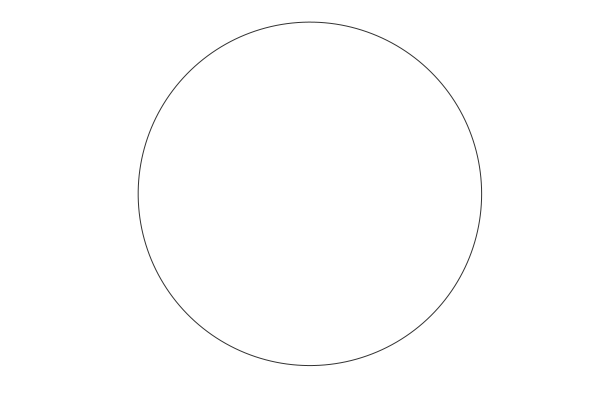

In [6]:
arena()

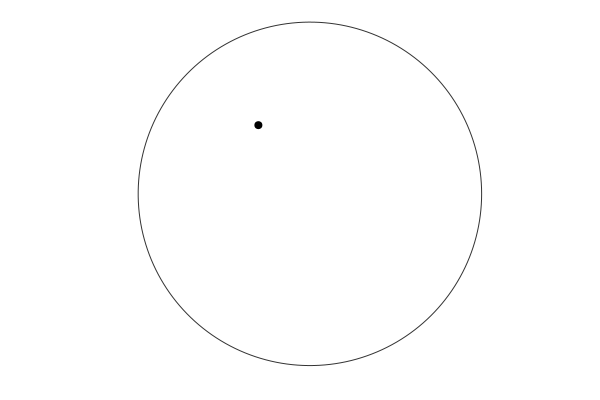

In [79]:
x, y = -0.3, 0.4
arena([x], [y], color="black")

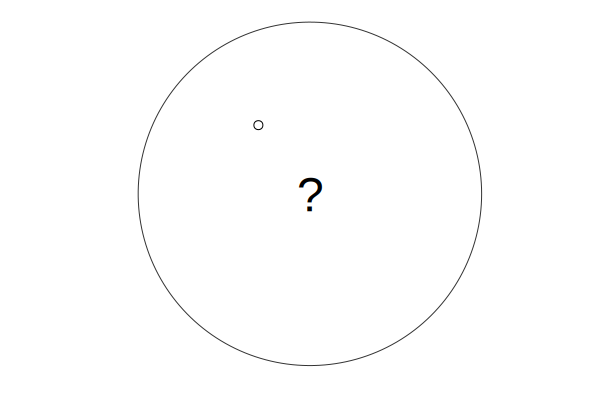

In [80]:
arena([x], [y], color=:white, markersize=5)
annotate!(0,0, text("?", 32))

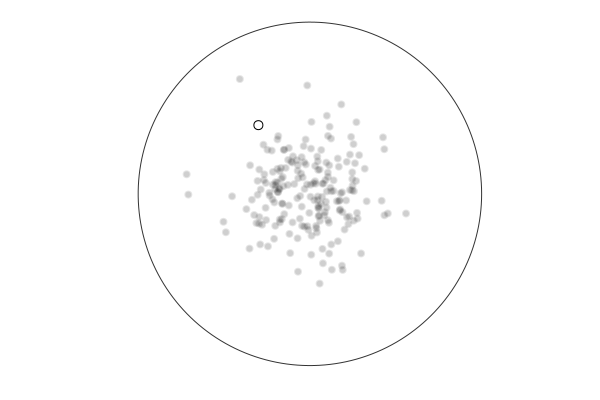

In [81]:
arena(randn(200).*0.2, randn(200).*0.2, color=:black, markeralpha=0.1)
scatter!([x], [y], color=:white, markersize=5)

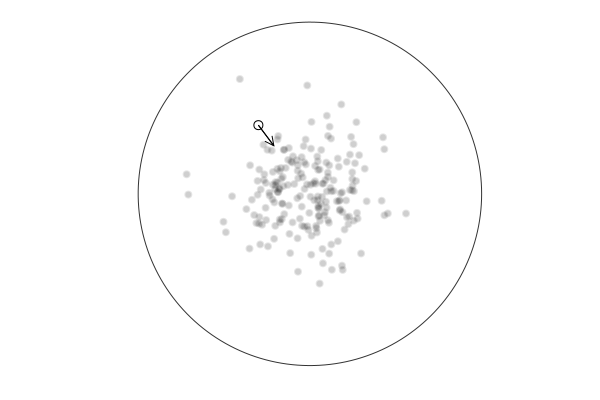

In [82]:
quiver!([x], [y], quiver=(-[x*0.3], -[y.*0.3]), color=:black)

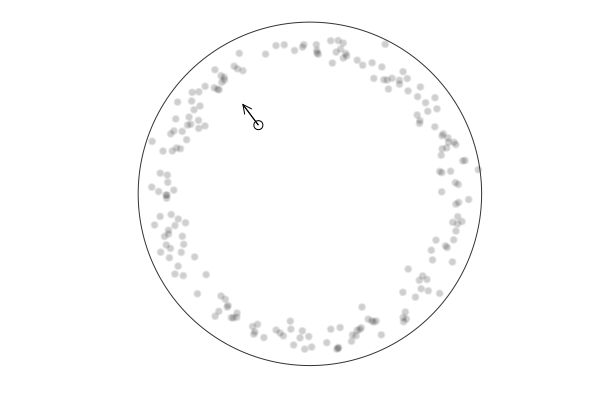

In [83]:
srand(2)
θ = rand(200) * 2π
ρ = randn(200) * .05 + 0.85

arena(cos.(θ).*ρ, sin.(θ).*ρ, markeralpha=0.1, color=:black)
scatter!([x], [y], color=:white, markersize=5)
quiver!([x], [y], quiver=([x*.3], [y*.3]), color=:black)

What is a 

# context?

In [67]:
recall1 = @where(recall, :subjid1 .== first(:subjid1))

200×24 DataFrames.DataFrame. Omitted printing of 15 columns
│ Row │ subjid1 │ block │ rep │ respnr │ line │ rad │ var  │ pred │ new_block │
├─────┼─────────┼───────┼─────┼────────┼──────┼─────┼──────┼──────┼───────────┤
│ 1   │ 1       │ 1     │ 1   │ 1      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 2   │ 1       │ 1     │ 2   │ 2      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 3   │ 1       │ 1     │ 3   │ 3      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 4   │ 1       │ 1     │ 4   │ 4      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 5   │ 1       │ 1     │ 5   │ 5      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 6   │ 1       │ 1     │ 6   │ 6      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 7   │ 1       │ 1     │ 7   │ 7      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 8   │ 1       │ 1     │ 8   │ 8      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 9   │ 1       │ 1     │ 9   │ 9      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 10  │ 1       │ 1     │ 10  │ 10     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 11  │ 1       │ 1     │ 11  │ 11     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
⋮
│ 189 │ 1       │ 25    │ 1   │ 189    │ 17   │ 0.3 │ 0.04 │ 0    │ true      │
│ 190 │ 1       │ 25    │ 2   │ 190    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 191 │ 1       │ 25    │ 3   │ 191    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 192 │ 1       │ 25    │ 4   │ 192    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 193 │ 1       │ 25    │ 5   │ 193    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 194 │ 1       │ 25    │ 6   │ 194    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 195 │ 1       │ 25    │ 7   │ 195    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 196 │ 1       │ 25    │ 8   │ 196    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 197 │ 1       │ 25    │ 9   │ 197    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 198 │ 1       │ 25    │ 10  │ 198    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 199 │ 1       │ 25    │ 11  │ 199    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 200 │ 1       │ 25    │ 12  │ 200    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │

In [71]:
r1_shuffled = view(recall1, randperm(size(recall1, 1)), :)
p = arena([], [], markeralpha=0.1, color=:black)
anim = @animate for (x,y) in @_ zip(r1_shuffled[:x], r1_shuffled[:y]) |> It.drop(_, 20) |> It.take(_, 100)
    push!(p, x,y)
end

gif(anim, "figures/shuffled.gif", fps=10)

INFO: Saved animation to /home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/shuffled.gif


Plots.AnimatedGif("/home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/shuffled.gif")

In [72]:
p = arena([], [], markeralpha=0.1, color=:black)
anim = @animate for (x,y) in @_ zip(recall1[:x], recall1[:y]) |> It.drop(_, 20) |> It.take(_, 100)
    push!(p, x,y)
end

gif(anim, "figures/clustered.gif", fps=10)

INFO: Saved animation to /home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/clustered.gif


Plots.AnimatedGif("/home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/clustered.gif")

# Behavior

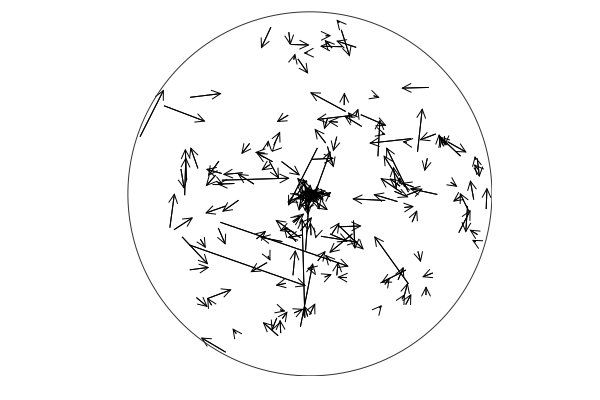

In [128]:
@df recall1 arena(:x, :y, quiver=(:x_resp.-:x, :y_resp.-:y), color=:black, seriestype=:quiver, lims=(-1,1))

In [129]:
known_recalled = by(recall, :subjid1) do d
    @_ KnownFilter(prior_optimized) |>
    RecallFilter(_, Matrix(0.01I,2,2)) |>
    filter!(_, extract_data(d, _)) |>
    DataFrame |>
    hcat(d, _) |>
    delete!(_, :subjid1) |>
    @transform(_, cosinesim = 1.-Distances.colwise(CosineDist(), 
                                                   hcat(:x_mod.-:x, :y_mod.-:y)', 
                                                   hcat(:x_resp.-:x, :y_resp.-:y)'))
end

known_recalled1 = @where(known_recalled, :subjid1 .== 1)



200×28 DataFrames.DataFrame. Omitted printing of 19 columns
│ Row │ subjid1 │ block │ rep │ respnr │ line │ rad │ var  │ pred │ new_block │
├─────┼─────────┼───────┼─────┼────────┼──────┼─────┼──────┼──────┼───────────┤
│ 1   │ 1       │ 1     │ 1   │ 1      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 2   │ 1       │ 1     │ 2   │ 2      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 3   │ 1       │ 1     │ 3   │ 3      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 4   │ 1       │ 1     │ 4   │ 4      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 5   │ 1       │ 1     │ 5   │ 5      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 6   │ 1       │ 1     │ 6   │ 6      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 7   │ 1       │ 1     │ 7   │ 7      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 8   │ 1       │ 1     │ 8   │ 8      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 9   │ 1       │ 1     │ 9   │ 9      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 10  │ 1       │ 1     │ 10  │ 10     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 11  │ 1       │ 1     │ 11  │ 11     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
⋮
│ 189 │ 1       │ 25    │ 1   │ 189    │ 17   │ 0.3 │ 0.04 │ 0    │ true      │
│ 190 │ 1       │ 25    │ 2   │ 190    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 191 │ 1       │ 25    │ 3   │ 191    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 192 │ 1       │ 25    │ 4   │ 192    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 193 │ 1       │ 25    │ 5   │ 193    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 194 │ 1       │ 25    │ 6   │ 194    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 195 │ 1       │ 25    │ 7   │ 195    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 196 │ 1       │ 25    │ 8   │ 196    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 197 │ 1       │ 25    │ 9   │ 197    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 198 │ 1       │ 25    │ 10  │ 198    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 199 │ 1       │ 25    │ 11  │ 199    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 200 │ 1       │ 25    │ 12  │ 200    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │

# Behavior vs. cluster bias

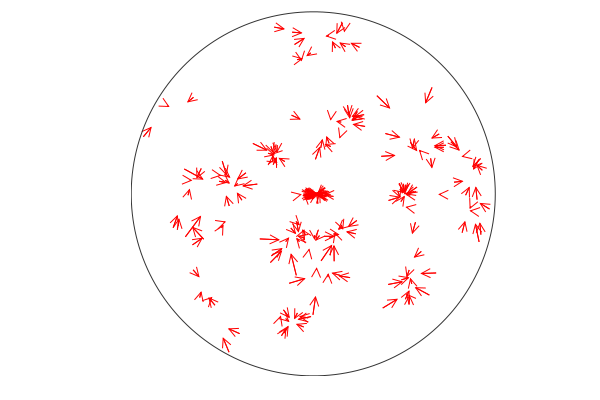

In [130]:
@df known_recalled1 arena(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y), seriestype=:quiver, color=:red)

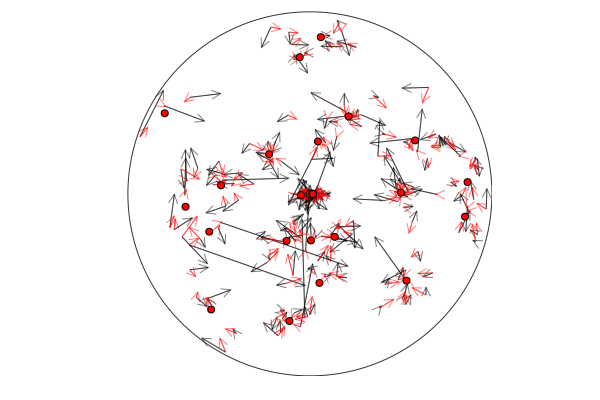

In [136]:
arena(lims=(-1,1))
@df known_recalled1 quiver!(:x, :y, quiver=(:x_resp.-:x, :y_resp.-:y), color=GrayA(0.0, 0.5))
@df known_recalled1 quiver!(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y), color=RGBA(1, 0, 0, 0.5))
@_ known_recalled1 |>
    @by(_, :block, x_clus = mean(:x), y_clus = mean(:y)) |>
    @df(_, scatter!(:x_clus, :y_clus, color=:red, seriestype=:scatter))


# Learning contexts

* _Infer_ how points $x_t$ are assigned $z_t$
    * $p(z_1, \ldots, z_T | x_1, \ldots, x_T) \propto p(x_1, \ldots, x_T | z_1, \ldots, z_T) p(z_1, \ldots, z_T)$
* Prior: $p(z_1, \ldots, z_T) = p(z_1) p(z_2 | z_1) \ldots p(z_T | z_1, \ldots, z_{T-1})$
    * Prefer small number of contexts
    * Allow for up to $T$ (one per point)
* Likelihood: $p(x_t | z_t, z_{1:t-1}, x_{1:t-1})$

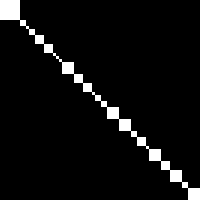

In [396]:
true_assignsim = Gray.(@with(recall1, :block .== :block'))

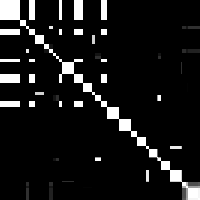

In [397]:
ps = ChenLiuParticles(1000, prior_optimized, StickyCRP(1.0, 0.9))
filter!(ps, extract_data(recall1, ps), false)
stickycrp = show_assignment_similarity(ps)

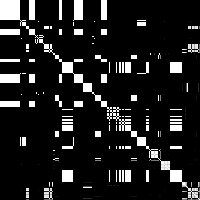

In [398]:
ps_crp = @_ ChineseRestaurantProcess(1.0) |>
    ChenLiuParticles(100, prior_optimized, _) |>
    filter!(_, extract_data(recall1, _), false)
crp = ps_crp |> show_assignment_similarity

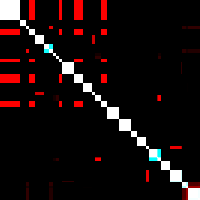

In [399]:
colorview(RGB, stickycrp, true_assignsim, true_assignsim)

In [400]:
assignments(ps)
sort!(ps.particles, by=weight, rev=true)
weight.(ps.particles)

1000-element Array{Float64,1}:
 0.00172126
 0.00172126
 0.00172126
 0.00168484
 0.00168484
 0.00168484
 0.00168077
 0.00168077
 0.00168077
 0.00168077
 0.00168077
 0.00168077
 0.00168077
 ⋮         
 7.98865e-5
 7.98865e-5
 7.98865e-5
 7.98865e-5
 7.90532e-5
 7.90532e-5
 7.90532e-5
 7.90532e-5
 2.74057e-5
 2.74057e-5
 2.74057e-5
 1.24157e-5

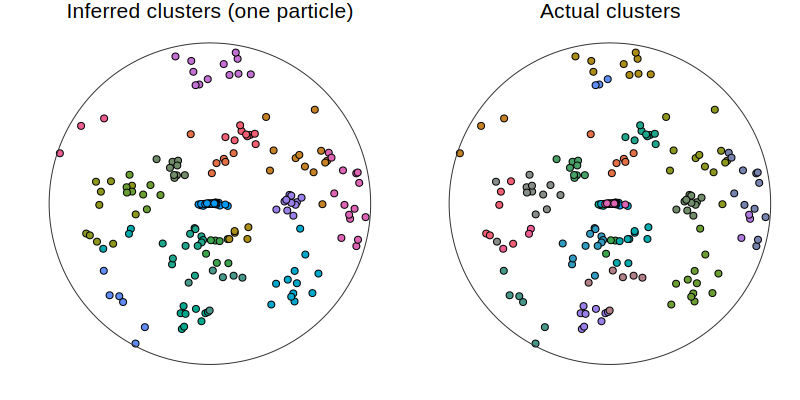

In [401]:
p1 = @df recall1 arena(:x, :y, group = assignments(first(ps.particles)), 
                     title = "Inferred clusters (one particle)")

p2 = @df recall1 arena(:x, :y, group = :block, title="Actual clusters")

plot(p1, p2, size=(800, 400))

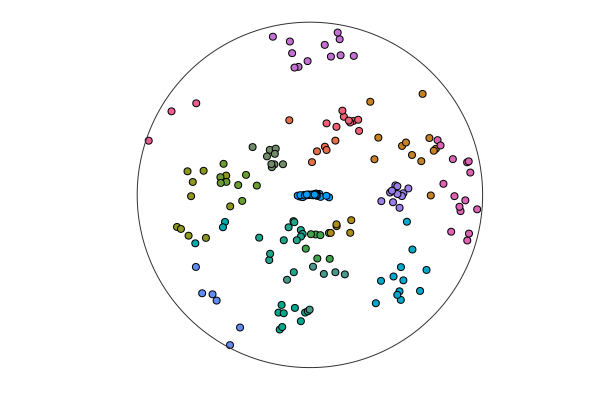

In [402]:
@df recall1 arena(:x, :y, group=assignments(first(ps.particles)))

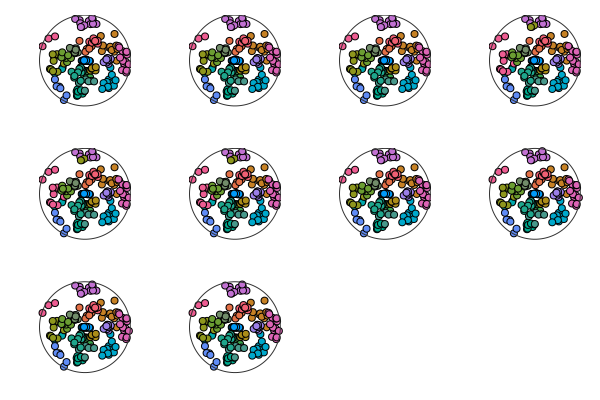

In [403]:
parts100 = map(ps.particles[1:10]) do particle
    @df recall1 arena(:x, :y, group = assignments(particle), lims=(-1,1))
end;

plot(parts100...)

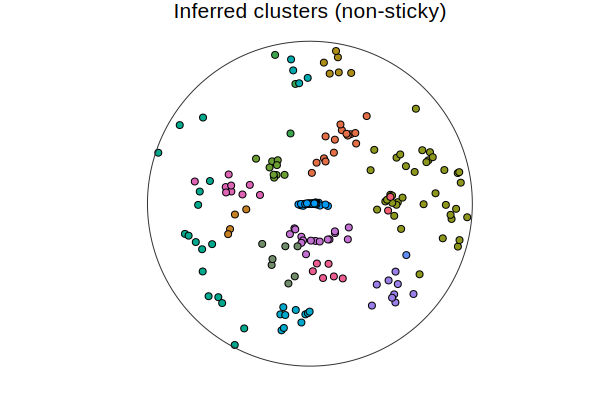

In [404]:
sort!(ps_crp.particles, by=weight, rev=true)
@df recall1 arena(:x, :y, group = assignments(first(ps_crp.particles)), 
                  title = "Inferred clusters (non-sticky)")

* for the most part, can separate clusters based on _sequence_, where the non-sticky often over- or under-clusters

In [405]:
plot(p1, p2, p3, layout=(1,3), size=(1200,400))

LoadError: [91mUndefVarError: p3 not defined[39m

# Modeling behavior

# Recall

* Recall: modeled as Bayesian cue combination (after Huttenlocher)
* two cues: thing you saw, and inferred context
* weighted average (by inverse-variance)

In [406]:
# result:
#   .experiment:
#     .data:
#     - (recall1, recall2, ...)
#     - (pred1, pred2, ...)
#   .result
#   - (recalled1, predicted1)
#   - (recalled2, predicted2)
#   - ...

function add_params!(df::AbstractDataFrame, params)
    for (k,v) in params
        df[k] = v
    end
    df
end

# extract input data (which is by subject) and predictions
recalled(r) =
    add_params!(hcat(vcat(r.experiment.data[1]...),
                     vcat(first.(r.result)...)),
                r.experiment.params)

predicted(r) =
    add_params!(hcat(vcat(r.experiment.data[2]...),
                     vcat(last.(r.result)...)[[:xys_mod]]),
                r.experiment.params)

predicted (generic function with 1 method)

In [407]:
recalled_all = mapreduce(recalled, vcat, results)

576000×33 DataFrames.DataFrame. Omitted printing of 25 columns
│ Row    │ subjid1 │ block │ rep  │ respnr │ line │ rad │ var  │ pred │
├────────┼─────────┼───────┼──────┼────────┼──────┼─────┼──────┼──────┤
│ 1      │ 1.0     │ 1.0   │ 1.0  │ 1.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 2      │ 1.0     │ 1.0   │ 2.0  │ 2.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 3      │ 1.0     │ 1.0   │ 3.0  │ 3.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 4      │ 1.0     │ 1.0   │ 4.0  │ 4.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 5      │ 1.0     │ 1.0   │ 5.0  │ 5.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 6      │ 1.0     │ 1.0   │ 6.0  │ 6.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 7      │ 1.0     │ 1.0   │ 7.0  │ 7.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 8      │ 1.0     │ 1.0   │ 8.0  │ 8.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 9      │ 1.0     │ 1.0   │ 9.0  │ 9.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 10     │ 1.0     │ 1.0   │ 10.0 │ 10.0   │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 11     │ 1.0     │ 1.0   │ 11.0 │ 11.0   │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
⋮
│ 575989 │ 8.0     │ 23.0  │ 10.0 │ 189.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575990 │ 8.0     │ 23.0  │ 11.0 │ 190.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575991 │ 8.0     │ 23.0  │ 12.0 │ 191.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575992 │ 8.0     │ 24.0  │ 1.0  │ 192.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575993 │ 8.0     │ 24.0  │ 2.0  │ 193.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575994 │ 8.0     │ 24.0  │ 3.0  │ 194.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575995 │ 8.0     │ 24.0  │ 4.0  │ 195.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575996 │ 8.0     │ 24.0  │ 5.0  │ 196.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575997 │ 8.0     │ 24.0  │ 6.0  │ 197.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575998 │ 8.0     │ 25.0  │ 1.0  │ 198.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │
│ 575999 │ 8.0     │ 25.0  │ 2.0  │ 199.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │
│ 576000 │ 8.0     │ 25.0  │ 3.0  │ 200.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │

rec_params_good = @_(((recalled_summaries |> @where(_, :Sσ .≈ 0.01)) |> sort!(_, :cos, rev=true)) |> head(_, 1)) = 1×5 DataFrames.DataFrame
│ Row │ α    │ ρ   │ Sσ   │ cos     │ mse      │
├─────┼──────┼─────┼──────┼─────────┼──────────┤
│ 1   │ 0.01 │ 0.9 │ 0.01 │ 0.11091 │ 0.123901 │


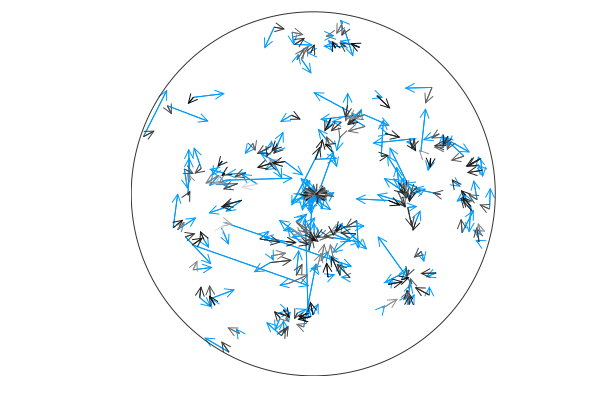

In [408]:
cosinesim(d) = cosinesim(d,d)
mse(d) = mse(d,d)

recalled_summaries = by(recalled_all, [:α, :ρ, :Sσ], d -> DataFrame(cos=cosinesim(d), mse=mse(d)))

# get a good parameter setting (one where cosine similarity is high and Sσ is high enough to see)
@show rec_params_good = @_ recalled_summaries |>
    @where(_, :Sσ .≈ 0.01) |>
    sort!(_, :cos, rev=true) |> 
    head(_, 1) 

# average over iterations
recalled_good = @_ rec_params_good |>
    join(recalled_all, _, on=[:α, :ρ, :Sσ]) |>
    @by(_, [:subjid1, :block, :rep, :rep_number, :respnr, :rad, :var, :x, :y, :x_resp, :y_resp],
        x_mod = mean(:x_mod), y_mod = mean(:y_mod)) 


recalled1 = @_ recalled_good |>
    @where(_, :subjid1 .== first(:subjid1))

@df(recalled1, begin
    arena(:x, :y, quiver=(:x_resp .- :x, :y_resp .- :y), seriestype=:quiver)
    quiver!(:x, :y, quiver=(:x_mod .- :x, :y_mod .- :y), line_z=:rep, color=:grays)
    end)

In [409]:
rho(args...) = sqrt(sum(args.^2))

rho (generic function with 1 method)

* Modeling radial bias: not a great measure at zero because if there's _response_ noise as well then you'll get a positive bias

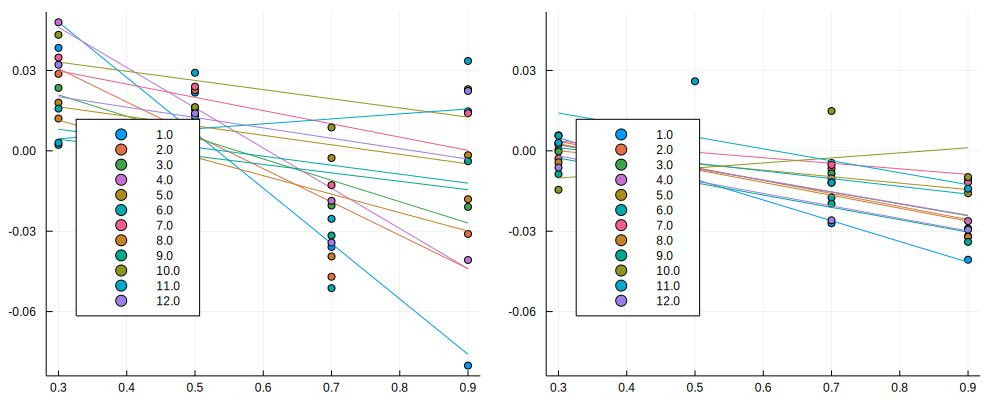

In [410]:
@_ recalled_good |>
    @where(_, :block .> 1) |>
    @transform(_, rho = rho.(:x, :y),
                  rho_resp = rho.(:x_resp, :y_resp),
                  rho_mod = rho.(:x_mod, :y_mod)) |>
    @by(_, [:rad, :rep], rho_bias_resp=mean(:rho_resp .- :rho),
                         rho_bias_mod=mean(:rho_mod .- :rho)) |>
    @where(_, :rad .> 0) |>
    @df(_, plot(scatter(:rad, :rho_bias_resp, group=:rep, smooth=true),# marker_z = :rep, line_z=:rep, color=:blues),
                scatter(:rad, :rho_bias_mod, group=:rep, smooth=true),# marker_z = :rep, line_z=:rep, color=:blues),
                size=(1000,400), legend=:bottomleft, link=:y))

## Baseline: clusters are known

In [411]:
known_recalled = by(recall, :subjid1) do d
    @_ KnownFilter(prior_optimized) |>
    RecallFilter(_, Matrix(rec_params_good[1, :Sσ]*I,2,2)) |>
    filter!(_, extract_data(d, _)) |>
    DataFrame |>
    hcat(d, _) |>
    delete!(_, :subjid1) |>
    @transform(_, cosinesim = 1.-Distances.colwise(CosineDist(), 
                                                   hcat(:x_mod.-:x, :y_mod.-:y)', 
                                                   hcat(:x_resp.-:x, :y_resp.-:y)'))
end

known_recalled1 = @where(known_recalled, :subjid1 .== 1)

200×28 DataFrames.DataFrame. Omitted printing of 19 columns
│ Row │ subjid1 │ block │ rep │ respnr │ line │ rad │ var  │ pred │ new_block │
├─────┼─────────┼───────┼─────┼────────┼──────┼─────┼──────┼──────┼───────────┤
│ 1   │ 1       │ 1     │ 1   │ 1      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 2   │ 1       │ 1     │ 2   │ 2      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 3   │ 1       │ 1     │ 3   │ 3      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 4   │ 1       │ 1     │ 4   │ 4      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 5   │ 1       │ 1     │ 5   │ 5      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 6   │ 1       │ 1     │ 6   │ 6      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 7   │ 1       │ 1     │ 7   │ 7      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 8   │ 1       │ 1     │ 8   │ 8      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 9   │ 1       │ 1     │ 9   │ 9      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 10  │ 1       │ 1     │ 10  │ 10     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 11  │ 1       │ 1     │ 11  │ 11     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
⋮
│ 189 │ 1       │ 25    │ 1   │ 189    │ 17   │ 0.3 │ 0.04 │ 0    │ true      │
│ 190 │ 1       │ 25    │ 2   │ 190    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 191 │ 1       │ 25    │ 3   │ 191    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 192 │ 1       │ 25    │ 4   │ 192    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 193 │ 1       │ 25    │ 5   │ 193    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 194 │ 1       │ 25    │ 6   │ 194    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 195 │ 1       │ 25    │ 7   │ 195    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 196 │ 1       │ 25    │ 8   │ 196    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 197 │ 1       │ 25    │ 9   │ 197    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 198 │ 1       │ 25    │ 10  │ 198    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 199 │ 1       │ 25    │ 11  │ 199    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 200 │ 1       │ 25    │ 12  │ 200    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │

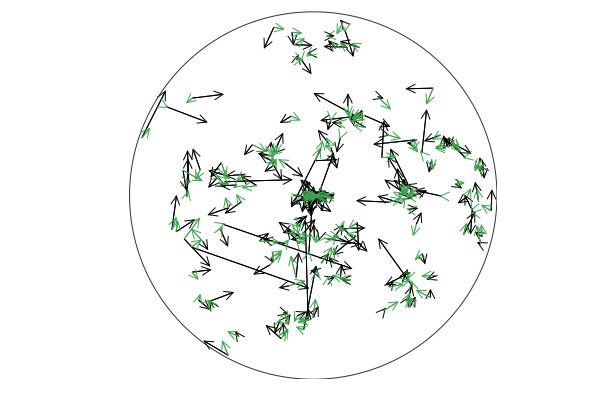

In [412]:
@df recall1 arena(:x, :y, quiver=(:x_resp.-:x, :y_resp.-:y), seriestype=:quiver, color=:black)

@_ known_recalled1 |>
    @where(_, :block .> 1) |>
    @df _ quiver!(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y))

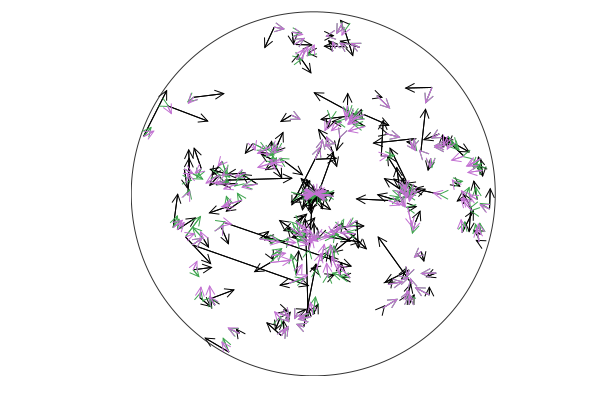

In [413]:
@_ recalled1 |>
    @where(_, :block .> 1) |>
    @df _ quiver!(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y))

* Other baseline models: always biased towards center, or always biased towards the mean radius

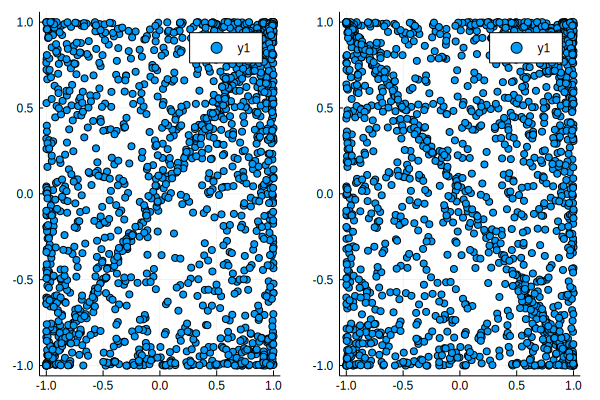

In [444]:
baseline_scores = @_ recalled_good |>
    @transform(_, gt_rho_avg = rho.(:x,:y) .> mean(rho.(:x, :y))) |>
    # @with(_, (hcat(:x,:y) .* ifelse.(:gt_rho_avg, -1, 1))')
    @transform(_, cos_center = 1 .- Distances.colwise(CosineDist(),
                                                      -hcat(:x, :y)', 
                                                      hcat(:x_resp.-:x, :y_resp.-:y)'),
                  cos_mean_rho = 1 .- Distances.colwise(CosineDist(),
                                                        (hcat(:x,:y) .* ifelse.(:gt_rho_avg, -1, 1))',
                                                        hcat(:x_resp.-:x, :y_resp.-:y)'),
                  cos_mod = 1 .- Distances.colwise(CosineDist(),
                                                   hcat(:x_mod.-:x, :y_mod.-:y)',
                                                   hcat(:x_resp.-:x, :y_resp.-:y)'))

@df baseline_scores plot(scatter(:cos_mod, :cos_center), scatter(:cos_mod, :cos_mean_rho))



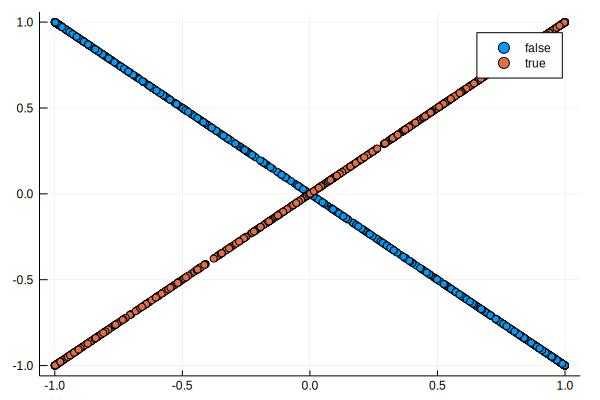

In [445]:
@df baseline_scores scatter(:cos_center, :cos_mean_rho, group=:gt_rho_avg)

* So this is interesting: the average difference in cosine similarities is positive, but a simple win/lose summary comes in a wash.  This suggests that when they disagree and one is wrong, the model is more likely to be right.

In [468]:
@_ baseline_scores |>
    @where(_, (!isnan).(:cos_center)) |>
    @by(_, :rad, 
        mod_gt_center = mean(:cos_mod .> :cos_center), 
        mod_minus_center = mean(:cos_mod .- :cos_center),
        mod_gt_meanrho = mean(:cos_mod .> :cos_mean_rho),
        mod_minus_meanrho = mean(:cos_mod .- :cos_mean_rho)) |>
    sort!(_, :rad)

5×5 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ rad │ mod_gt_center │ mod_minus_center │ mod_gt_meanrho │
├─────┼─────┼───────────────┼──────────────────┼────────────────┤
│ 1   │ 0.0 │ 0.498575      │ -0.0812969       │ 0.538462       │
│ 2   │ 0.3 │ 0.490385      │ 0.0762239        │ 0.487179       │
│ 3   │ 0.5 │ 0.541667      │ 0.194667         │ 0.491071       │
│ 4   │ 0.7 │ 0.505952      │ 0.0340896        │ 0.502976       │
│ 5   │ 0.9 │ 0.488636      │ 0.024308         │ 0.488636       │

In [589]:
@_ baseline_scores |>
    @where(_, (!isnan).(:cos_center)) |>
    @by(_, :subjid1, 
        mod_gt_center = mean(:cos_mod .> :cos_center), 
        mod_minus_center = mean(:cos_mod .- :cos_center),
        mod_gt_meanrho = mean(:cos_mod .> :cos_mean_rho),
        mod_minus_meanrho = mean(:cos_mod .- :cos_mean_rho))

8×5 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ subjid1 │ mod_gt_center │ mod_minus_center │ mod_gt_meanrho │
├─────┼─────────┼───────────────┼──────────────────┼────────────────┤
│ 1   │ 1.0     │ 0.485         │ -0.0325187       │ 0.52           │
│ 2   │ 2.0     │ 0.445         │ -0.0358331       │ 0.59           │
│ 3   │ 3.0     │ 0.465         │ -0.0592764       │ 0.44           │
│ 4   │ 4.0     │ 0.55          │ 0.239            │ 0.535          │
│ 5   │ 5.0     │ 0.515         │ 0.073145         │ 0.54           │
│ 6   │ 6.0     │ 0.425         │ -0.106147        │ 0.39           │
│ 7   │ 7.0     │ 0.615         │ 0.342142         │ 0.545          │
│ 8   │ 8.0     │ 0.547739      │ -0.0280205       │ 0.462312       │

In [591]:
@_ recalled_good |>
    @where(_, :subjid1 .== 7)

(200, 13)

In [579]:
@_ baseline_scores |>
    @where(_, (!isnan).(:cos_center)) |>
    @by(_, :rep, 
        mod_gt_center = mean(:cos_mod .> :cos_center), 
        mod_minus_center = mean(:cos_mod .- :cos_center),
        mod_gt_meanrho = mean(:cos_mod .> :cos_mean_rho),
        mod_minus_meanrho = mean(:cos_mod .- :cos_mean_rho)) |>
    sort!(_, :rep)

20×5 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ rep  │ mod_gt_center │ mod_minus_center │ mod_gt_meanrho │
├─────┼──────┼───────────────┼──────────────────┼────────────────┤
│ 1   │ 1.0  │ 0.512563      │ 0.0881608        │ 0.482412       │
│ 2   │ 2.0  │ 0.495         │ 0.0121937        │ 0.465          │
│ 3   │ 3.0  │ 0.51          │ 0.00881509       │ 0.48           │
│ 4   │ 4.0  │ 0.532895      │ 0.0543935        │ 0.506579       │
│ 5   │ 5.0  │ 0.493421      │ 0.0674211        │ 0.519737       │
│ 6   │ 6.0  │ 0.493421      │ 0.032206         │ 0.467105       │
│ 7   │ 7.0  │ 0.461538      │ 0.0332957        │ 0.480769       │
│ 8   │ 8.0  │ 0.548077      │ 0.122675         │ 0.586538       │
│ 9   │ 9.0  │ 0.480769      │ 0.0541619        │ 0.5            │
│ 10  │ 10.0 │ 0.571429      │ 0.0832292        │ 0.571429       │
│ 11  │ 11.0 │ 0.553571      │ 0.128053         │ 0.517857       │
│ 12  │ 12.0 │ 0.517857      │ 0.0630412        │ 0.482143       │
│ 13  │ 13.0 │ 0.5           │ -0.00388455      │ 0.625          │
│ 14  │ 14.0 │ 0.375         │ -0.131822        │ 0.875          │
│ 15  │ 15.0 │ 0.375         │ 0.130389         │ 0.75           │
│ 16  │ 16.0 │ 0.625         │ -0.236063        │ 0.75           │
│ 17  │ 17.0 │ 0.5           │ 0.194844         │ 0.375          │
│ 18  │ 18.0 │ 0.25          │ -0.00254652      │ 0.5            │
│ 19  │ 19.0 │ 0.5           │ -0.159544        │ 0.375          │
│ 20  │ 20.0 │ 0.375         │ -0.272207        │ 0.875          │

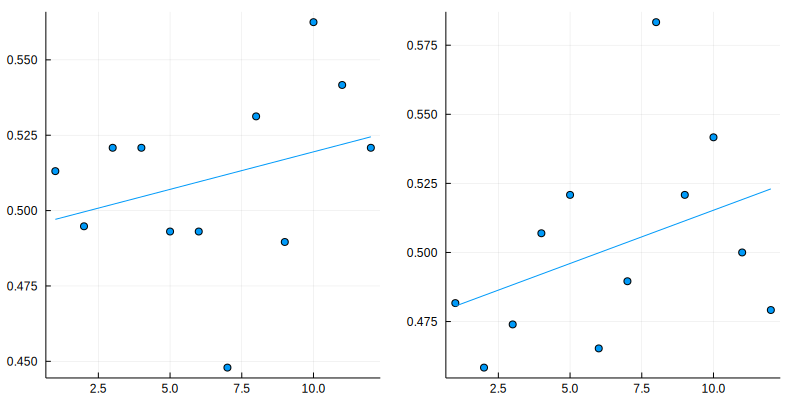

In [588]:
@_ baseline_scores |>
    @where(_, (!isnan).(:cos_center)) |>
    @where(_, :block .> 1) |>
    @by(_, [:rep], 
        mod_gt_center = mean(:cos_mod .> :cos_center), 
        mod_minus_center = mean(:cos_mod .- :cos_center),
        mod_gt_meanrho = mean(:cos_mod .> :cos_mean_rho),
        mod_minus_meanrho = mean(:cos_mod .- :cos_mean_rho)) |>
    @df(_, plot(scatter(:rep, :mod_gt_center, smooth=true),
                scatter(:rep, :mod_gt_meanrho, smooth=true),
                size=(800, 400), legend=false))

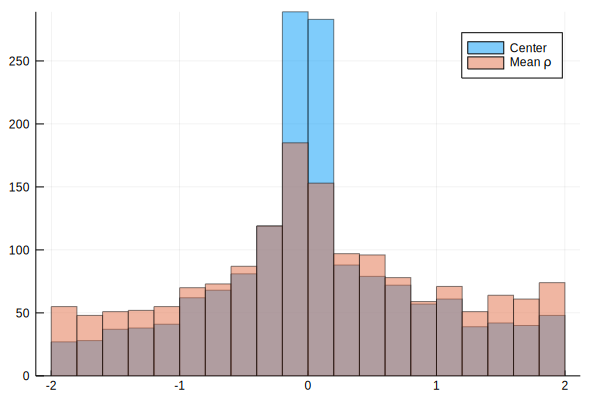

In [478]:
@_ baseline_scores |>
    @where(_, (!isnan).(:cos_center)) |>
    @df(_, begin
            histogram(:cos_mod .- :cos_center, bin=30, label="Center", alpha=0.5)
            histogram!(:cos_mod .- :cos_mean_rho, bin=30, label="Mean \\rho", alpha=0.5)
        end)
    


In [485]:
let x = cos.(rand(10000).*2π), y = cos.(rand(10000).*2π)
    plot(scatter(x,y, alpha=0.2),
         histogram(x.-y))
end

In [483]:
@with(baseline_scores, (mean(:cos_mod), mean(:cos_mod .> 0)))

(0.1134105902994006, 0.571875)

# Prediction

In [414]:
predicted(first(results))

680×27 DataFrames.DataFrame. Omitted printing of 18 columns
│ Row │ subjid1 │ block │ rep  │ respnr │ line │ rad │ var │ pred │ new_block │
├─────┼─────────┼───────┼──────┼────────┼──────┼─────┼─────┼──────┼───────────┤
│ 1   │ 1.0     │ 1.0   │ 20.0 │ 20     │ 1.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 2   │ 1.0     │ 2.0   │ 3.0  │ 23     │ 6.0  │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 3   │ 1.0     │ 2.0   │ 6.0  │ 26     │ 6.0  │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 4   │ 1.0     │ 2.0   │ 6.0  │ 26     │ 6.0  │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 5   │ 1.0     │ 3.0   │ 3.0  │ 29     │ 19.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 6   │ 1.0     │ 3.0   │ 3.0  │ 29     │ 19.0 │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 7   │ 1.0     │ 4.0   │ 3.0  │ 32     │ 9.0  │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 8   │ 1.0     │ 4.0   │ 6.0  │ 35     │ 9.0  │ 0.0 │ 0.0 │ 5    │ 0.0       │
│ 9   │ 1.0     │ 4.0   │ 6.0  │ 35     │ 9.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 10  │ 1.0     │ 5.0   │ 3.0  │ 38     │ 7.0  │ 0.9 │ 0.0 │ 1    │ 0.0       │
│ 11  │ 1.0     │ 5.0   │ 6.0  │ 41     │ 7.0  │ 0.9 │ 0.0 │ 5    │ 0.0       │
⋮
│ 669 │ 8.0     │ 22.0  │ 12.0 │ 179    │ 22.0 │ 0.7 │ 0.0 │ 5    │ 0.0       │
│ 670 │ 8.0     │ 22.0  │ 12.0 │ 179    │ 22.0 │ 0.7 │ 0.0 │ 10   │ 0.0       │
│ 671 │ 8.0     │ 23.0  │ 3.0  │ 182    │ 17.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 672 │ 8.0     │ 23.0  │ 6.0  │ 185    │ 17.0 │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 673 │ 8.0     │ 23.0  │ 9.0  │ 188    │ 17.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 674 │ 8.0     │ 23.0  │ 12.0 │ 191    │ 17.0 │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 675 │ 8.0     │ 23.0  │ 12.0 │ 191    │ 17.0 │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 676 │ 8.0     │ 24.0  │ 3.0  │ 194    │ 23.0 │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 677 │ 8.0     │ 24.0  │ 6.0  │ 197    │ 23.0 │ 0.0 │ 0.0 │ 5    │ 0.0       │
│ 678 │ 8.0     │ 24.0  │ 6.0  │ 197    │ 23.0 │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 679 │ 8.0     │ 25.0  │ 3.0  │ 200    │ 4.0  │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 680 │ 8.0     │ 25.0  │ 3.0  │ 200    │ 4.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │

In [416]:
predicted_all = @_ vcat([predicted(r) for r in results]...) |>
    @by(_, [:subjid1, :block, :respnr, :pred, :theta_resp, :rho_resp, :α, :ρ], xys_mod = (:xys_mod...)) |>
    @transform(_, subjid1 = Int.(:subjid1),
                  block = Int.(:block), 
                  respnr = Int.(:respnr),
                  x_resp = cos.(:theta_resp) .* :rho_resp./2π,
                  y_resp = sin.(:theta_resp) .* :rho_resp./2π,
                  xys_mod = [vcat(xym...) for xym in :xys_mod])

predicted_good = @_ predicted_all |>
    join(_, delete!(copy(rec_params_good), :Sσ), on=[:α, :ρ]) |>
    join(_, @select(recall, :subjid1, :block, :respnr, :x, :y), 
            on=[:subjid1, :block, :respnr]) |>
    sort!(_, (:subjid1, :respnr, :pred))

predicted1 = @where(predicted_good, :subjid1 .== 1);

In [417]:
@_ predicted1 |> 
    @by(_, :respnr, pred=sort(unique(:pred)))

85×2 DataFrames.DataFrame
│ Row │ respnr │ pred │
├─────┼────────┼──────┤
│ 1   │ 20     │ 10   │
│ 2   │ 23     │ 1    │
│ 3   │ 26     │ 5    │
│ 4   │ 26     │ 10   │
│ 5   │ 29     │ 1    │
│ 6   │ 29     │ 10   │
│ 7   │ 32     │ 1    │
│ 8   │ 35     │ 5    │
│ 9   │ 35     │ 10   │
│ 10  │ 38     │ 1    │
│ 11  │ 41     │ 5    │
⋮
│ 74  │ 176    │ 5    │
│ 75  │ 179    │ 1    │
│ 76  │ 182    │ 5    │
│ 77  │ 182    │ 10   │
│ 78  │ 185    │ 1    │
│ 79  │ 188    │ 5    │
│ 80  │ 188    │ 10   │
│ 81  │ 191    │ 1    │
│ 82  │ 194    │ 5    │
│ 83  │ 197    │ 1    │
│ 84  │ 200    │ 5    │
│ 85  │ 200    │ 10   │

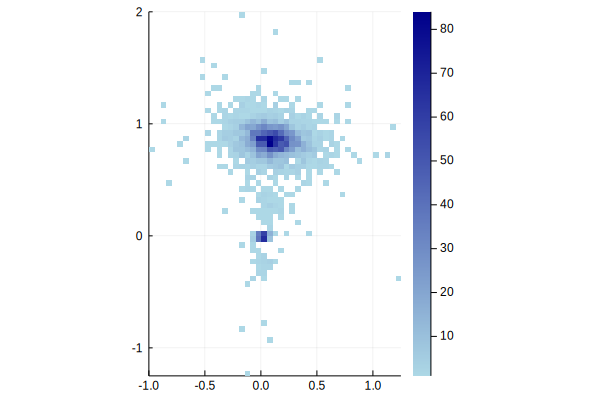

In [548]:
@df predicted1[10,:] plot(:xys_mod[1][:,1], :xys_mod[1][:,2], seriestype=:histogram2d, aspect_ratio=:equal, color=:blues)

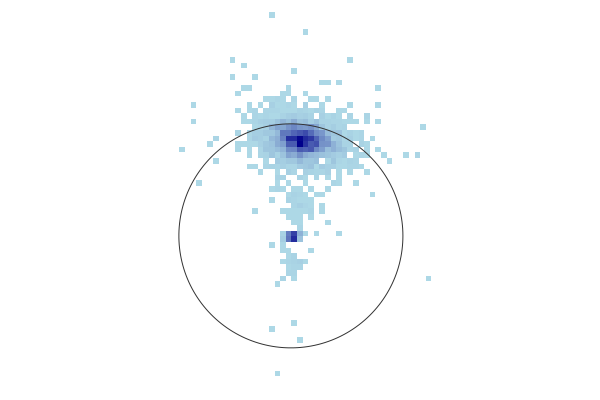

In [549]:
@df predicted1[10,:] arena(:xys_mod[1][:,1], :xys_mod[1][:,2], seriestype=:histogram2d, color=:blues)

In [567]:
function plot_prediction_task(xys_mod::Matrix, 
                              x::Float64, y::Float64, 
                              x_resp::Float64, y_resp::Float64)
    p = arena(xys_mod[:,1], xys_mod[:,2], seriestype=:histogram2d, color=:blues, 
              bins=linspace(-1.2, 1.2, 50), lims=(-1.2, 1.2))
    scatter!(p, [x], [y], color=:white)
    scatter!(p, [x_resp], [y_resp], color=:red)
    return p
end

function plot_prediction_task(d::AbstractDataFrame, args...; title=true, kwargs...)
    plots = let plots = [], title=title
        @byrow! d begin
            push!(plots, plot_prediction_task(:xys_mod, :x, :y, :x_resp, :y_resp))
            title!(plots[end], title ? "Trial $(:respnr) (+$(:pred))" : "")
        end
        plots
    end
    plot(plots..., args...; kwargs...)
end


plot_prediction_task (generic function with 4 methods)

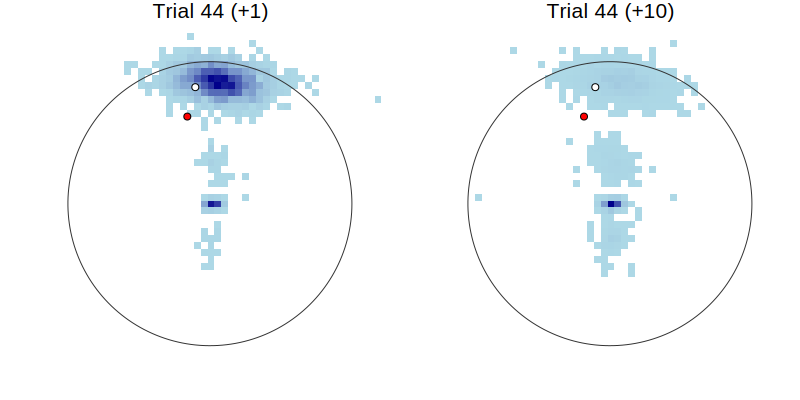

In [565]:
@_ predicted1 |>
    @where(_, :respnr .== 44) |>
    plot_prediction_task(_, title=true, size=(800, 400))

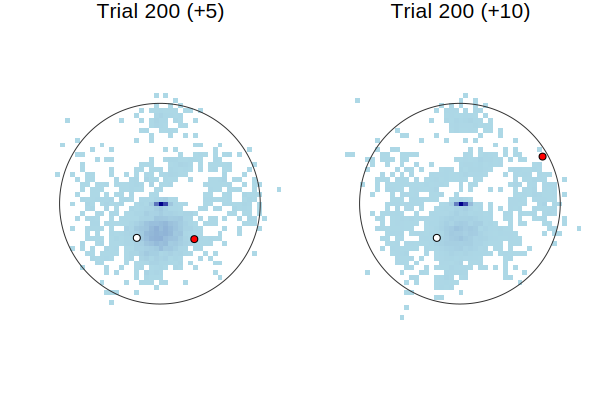

In [564]:
plot_prediction_task(predicted1[end-1:end,:])

In [570]:
let anim = Animation()
    @byrow! predicted1 begin
        plot_prediction_task(:xys_mod, :x, :y, :x_resp, :y_resp)
        title!("Trial $(:respnr) (+$(:pred))")
        frame(anim)
    end
    gif(anim, "figures/pred1.gif", fps=1)
end


INFO: Saved animation to /home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/pred1.gif


Plots.AnimatedGif("/home/dave/.dropbox-raizadalab/Dropbox (Raizada Lab)/work/dots-location-memory-pernille/figures/pred1.gif")

* How far away from the last point do people typically guess?

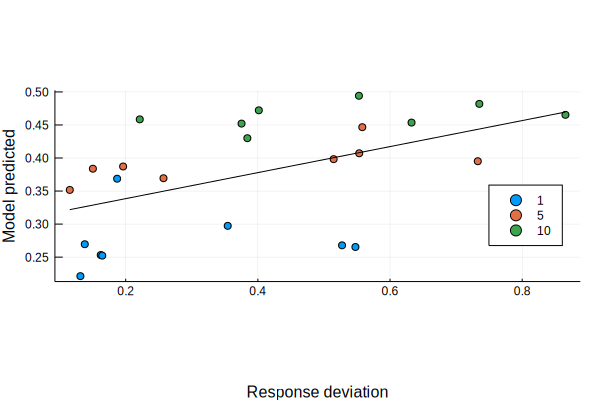

In [571]:
prediction_deviations = @_ predicted_good |>
    @transform(_, resp_dev = rho.(:x.-:x_resp, :y.-:y_resp), 
                  mod_dev = mean.(pairwise.(Euclidean(), 
                                            transpose.(hcat.(:x, :y)),
                                            transpose.(:xys_mod))))

@_ prediction_deviations |>
    @by(_, [:subjid1, :pred], resp_dev = mean(:resp_dev), mod_dev = mean(:mod_dev)) |>
    @df(_, begin 
        scatter(:resp_dev, :mod_dev, xlabel="Response deviation", ylabel="Model predicted", 
                group=:pred, legend=:bottomright, aspect_ratio=:equal)
        scatter!(:resp_dev, :mod_dev, markeralpha=0, color=:black, label="", smooth=true)
        end)


* even _within_ a prediction offset, there's some variability in the deviation of the prediction from the current point.
* ...and there's a postive relation between what the model 

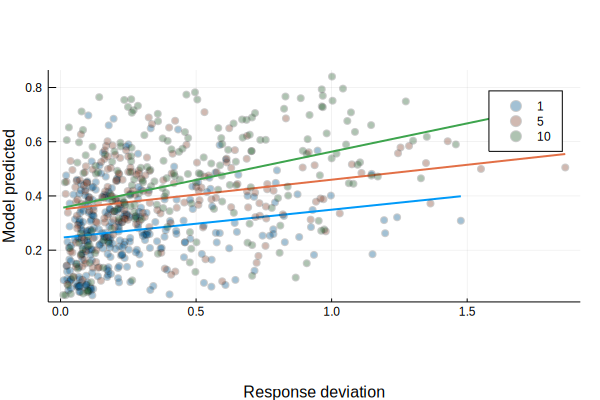

In [577]:
@_ prediction_deviations |>
    @by(_, [:subjid1, :block, :respnr, :pred], resp_dev = mean(:resp_dev), mod_dev = mean(:mod_dev)) |>
    @df(_, scatter(:resp_dev, :mod_dev, xlabel="Response deviation", ylabel="Model predicted", 
                   group=:pred, smooth=true, markeralpha=.2, line=2, aspect_ratio = :equal))
